# Homework 11

In this homework, you are going to use the code from TrafficSignsClassification notebook and create your own traffic sign classifier.

# Step 1
Use the data from data/subset_homework folder and visualize some examples. How many images are there for each class?

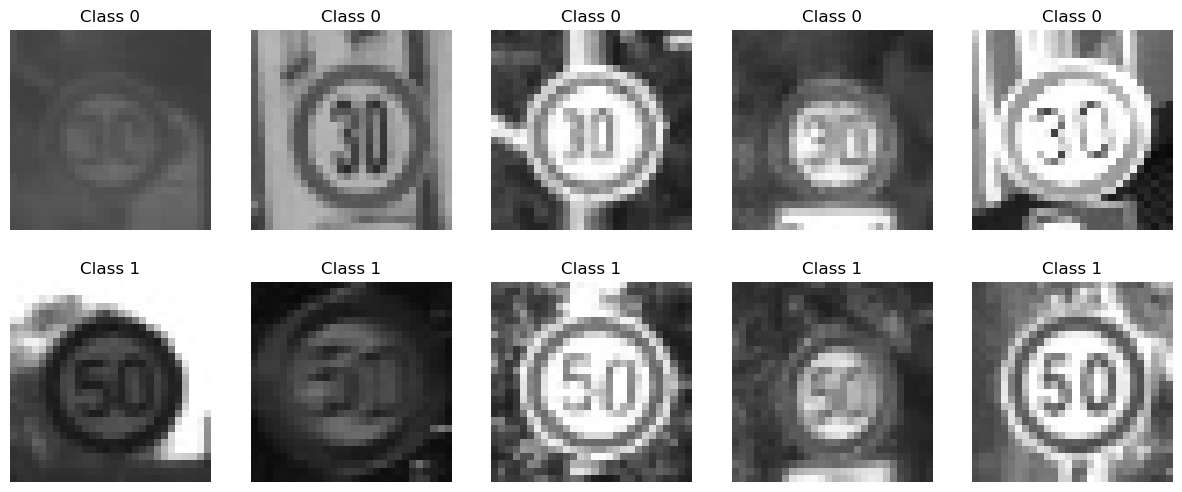

Number of samples in Class 0: 2220
Number of samples in Class 1: 2250


In [37]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
folder = '/Users/Roman Zubrytskyi/Computer-Vision-v2/lesson_12/data/subset_homework'

fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 5)):
    plt.subplot(2, 5, cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Class 0'), plt.axis('off')

fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 5)):
    plt.subplot(2, 5, cnt+6)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Class 1'), plt.axis('off')

plt.show()

print('Number of samples in Class 0:', len(images_0))
print('Number of samples in Class 1:', len(images_1))

# Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

Images shape: (4470, 28, 28)
Labels shape: (4470,)
Pixels shape: (4470, 784)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5140 - loss: 0.7155 - val_accuracy: 0.6499 - val_loss: 0.6499
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.6464 - loss: 0.6399 - val_accuracy: 0.6946 - val_loss: 0.6130
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.7087 - loss: 0.6010 - val_accuracy: 0.7315 - val_loss: 0.5833
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7443 - loss: 0.5706 - val_accuracy: 0.7606 - val_loss: 0.5612
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.7717 - loss: 0.5494 - val_accuracy: 0.7785 - val_loss: 0.5414
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.7921 - loss: 0.5262 - val_accuracy: 0.7987 - val_loss: 0.5153
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8136 - loss: 0.5040 - val_accuracy: 0.8244 - val_loss: 0.4971
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.8399 - loss: 0.4830 - va

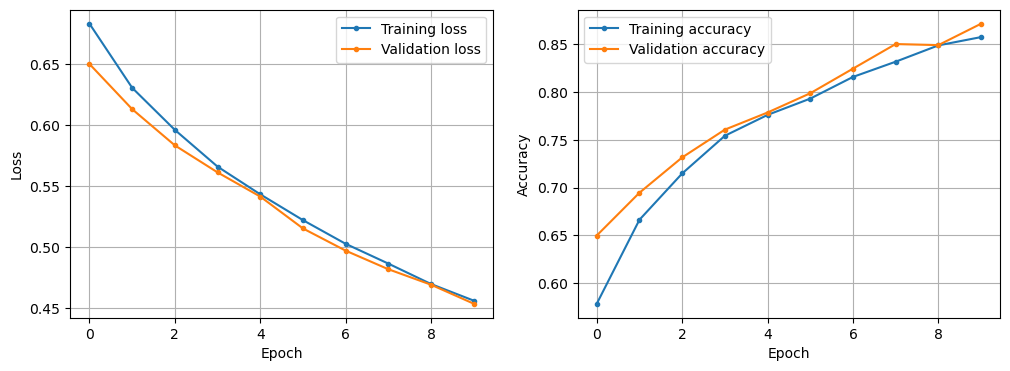

In [30]:
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels, random_state=42)
images = np.array(images)
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

pixels = np.array([image.flatten() for image in images]) / 255.0
print('Pixels shape:', pixels.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation='sigmoid')(inputs)
model = Model(inputs, outputs)

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '.-', label='Training loss')
plt.plot(history.history['val_loss'], '.-', label='Validation loss')
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.legend(), plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '.-', label='Training accuracy')
plt.plot(history.history['val_accuracy'], '.-', label='Validation accuracy')
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.legend(), plt.grid(True)

plt.show()

We have achieved an accuracy of 87.14% with a single neuron.

# Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5500 - loss: 0.7021 - val_accuracy: 0.7069 - val_loss: 0.6215
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6548 - loss: 0.6274 - val_accuracy: 0.7483 - val_loss: 0.5489
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7015 - loss: 0.5817 - val_accuracy: 0.8221 - val_loss: 0.4624
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7702 - loss: 0.4979 - val_accuracy: 0.8658 - val_loss: 0.3494
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.4168 - val_accuracy: 0.9060 - val_loss: 0.3013
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8188 - loss: 0.3932 - val_accuracy: 0.9083 - val_loss: 0.3190
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8288 - loss: 0.3928 - val_accuracy: 0.8322 - val_loss: 0.3914
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.3761 - val_accuracy: 0.

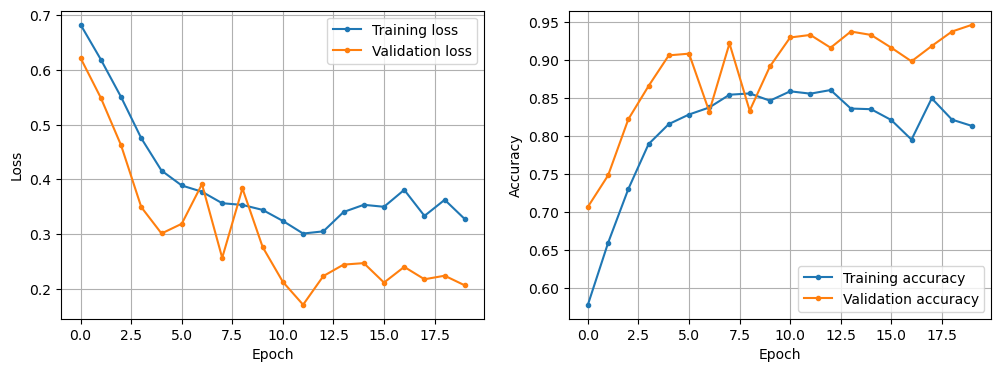

In [35]:
from tensorflow.keras.layers import Dense, Input, Dropout

inputs = Input(shape=(pixels.shape[1],))
x = Dense(128, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_improved = Model(inputs, outputs)

model_improved.summary()
model_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_improved = model_improved.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['loss'], '.-', label='Training loss')
plt.plot(history_improved.history['val_loss'], '.-', label='Validation loss')
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.legend(), plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['accuracy'], '.-', label='Training accuracy')
plt.plot(history_improved.history['val_accuracy'], '.-', label='Validation accuracy')
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.legend(), plt.grid(True)

plt.show()

With an improved model we have achieved an accuracy of 94.63% which is definitely an improvement.